In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
%matplotlib inline

# Data files full clean

In [2]:
import os
import re

if not os.path.exists("./cleandata"):
    os.makedirs("./cleandata")
content = os.listdir("./newdata")

for item in content:
    # delete the text files and the urls files to clean the library
    #print(item)
    if item.find(".txt") > 0:
        # print(item)
        with open("./newdata/{}".format(item), "r", encoding="iso-8859-1") as f:
            lines = f.readlines()
        # if (os.path.exists("./cleandata/{}".format(item))):
        with open("./cleandata/{}".format(item), "w+") as f:

            for line in lines:
                if "10 Messungen" in line.strip("\n"):
                    line = line[line.find("Ch") :]
                    # print(newline)
                # if (line.strip("\n") != "þStartfischer1 p33-6 hf8 fc6x 0.9km")
                if "Ch" in line.strip("\n") or "V" in line.strip("\n"):
                    f.write(line.replace(";", ""))
f.close()

# print(content)

# Extract the Data and convert it to Dataframes and Excel files

In [3]:
import xlwt
a={}
lst={}
lstdeltas={}
lstverhalt={}
content = os.listdir("./cleandata")
result=pd.DataFrame()
verhaeltnis=pd.DataFrame()
deltas=pd.DataFrame()
for x in content:
    if (x.find(".txt") > 0 and x != ".git"):
        #print(x)
        df = pd.read_csv("./cleandata/{}".format(x),names=["channal", "min", "max", "x", "y"],sep="\s+",encoding="ISO-8859-1")
        dx = df.drop(["x", "y"], axis=1)
        dx["min"] = dx["min"]  # .map(lambda x: x.lstrip("+-;").rstrip("aAbBcC;"))
        dx["channal"] = dx["channal"]  # .map(lambda x: x.lstrip(";").rstrip(";"))
        if 100 in dx.index:
            dx = dx.drop(100)
        dx["min"] = pd.to_numeric(dx["min"])
        dx["max"] = pd.to_numeric(dx["max"])
        dx["deltas"] = dx["max"] - dx["min"]
        #dx["name"]=x.strip('.txt')
        ########### Extract channals ######

        ch0=dx[dx.channal == "Ch0:"]
        ch1=dx[dx.channal == "Ch1:"]
        ch2=dx[dx.channal == "Ch2:"]
        ch3=dx[dx.channal == "Ch3:"]
        ch4=dx[dx.channal == "Ch4:"]
        ch5=dx[dx.channal == "Ch5:"]
        ch6=dx[dx.channal == "Ch6:"]
        ch7=dx[dx.channal == "Ch7:"]
        ch8=dx[dx.channal == "Ch8:"]
        #print(ch0.head())
        ############ build the deltas #############
        delta0= ch0["max"] -  ch0["min"]
        lst['delta0']=delta0
        delta1= ch1["max"] -  ch1["min"]
        lst['delta1']=delta1
        delta2= ch2["max"] -  ch2["min"]
        lst['delta2']=delta2
        delta3= ch3["max"] -  ch3["min"]
        lst['delta3']=delta3
        delta4= ch4["max"] -  ch4["min"]
        lst['delta4']=delta4
        delta5= ch5["max"] -  ch5["min"]
        lst['delta5']=delta5
        delta6= ch6["max"] -  ch6["min"]
        lst['delta6']=delta6
        delta7= ch7["max"] -  ch7["min"]
        lst['delta7']=delta7
        delta8= ch8["max"] -  ch8["min"]
        lst['delta8']=delta8
        #print(delta0.head())
        ##################### format reset index

        df_new = pd.DataFrame.from_dict(lst)
        df_new=df_new.apply(lambda x: pd.Series(x.dropna().values))
        #print(df_new.head(3))
        #df_new.to_excel("dfnew.xlsx")
        dv=dx[dx.channal == "V:"]
        ########## connect the name of Measurement
        dv.index.name=x.strip('.txt')
        dx.index.name = x.strip('.txt')
        df_new.index.name=x.strip('.txt')

        dx=dx.reset_index()
        dv=dv.reset_index()
        df_new=df_new.reset_index()

        if not (dx.empty and deltas.empty):
            a[x.strip('.txt')]=dx
            lstdeltas[x.strip('.txt')]=df_new
            
        dv=dv.replace('V:', 'V:{}'.format(x.strip('.txt')))
        rows=df_new.shape[0]
        #print(rows)
        for row in range(rows):
            df_new["name"]=x.strip('.txt')
        #drop empty Dataframes
        if not (dx.empty):
            result=pd.concat([result,dx.append(pd.Series(name='V_Spacer',dtype='float'))],axis=1)
            verhaeltnis=pd.concat([verhaeltnis,dv],axis=1)
            new_df=result.append(verhaeltnis)
            deltas=pd.concat([deltas,df_new],axis=1)
            lstverhalt[x.strip('.txt')]=dv

        rows= deltas.shape[0]


#new_df=pd.concat([result,verhaeltnis])
#print(result.head())
#result.to_excel("result.xlsx")
verhaeltnis=verhaeltnis.drop(["max","deltas"], axis=1)
verhaeltnis=verhaeltnis.rename(columns={"min": "V"})
#verhaeltnis.head()
#verhaeltnis.to_excel("verhaeltnis.xlsx")
# verhaeltnis.to_excel("FullData.xlsx",sheet_name='verhältnis')
#deltas.to_excel("deltas.xlsx")
# deltas.to_excel("FullData.xlsx",sheet_name='deltas')
# new_df.to_excel("FullData.xls",sheet_name='fullData')
# with pd.ExcelWriter('FullDataAll.xlsx') as writer:
#     result.to_excel(writer, sheet_name='cleanValues')  
#     new_df.to_excel(writer, sheet_name='cleanWithVerhältnis')
#     deltas.to_excel(writer, sheet_name='deltas')
#     verhaeltnis.to_excel(writer, sheet_name='verhaeltnis')
#     new_df["spacer1"]=" "
#     new_df["spacer2"]=" "
#     merged_df=pd.merge(new_df,deltas.reset_index(),how='outer')
#     merged_df.to_excel(writer, sheet_name='FullDataAll')


In [4]:
#print(new_df.head())
#print(deltas.head())
new_df["spacer1"]=" "
new_df["spacer2"]=" "
merged_df=pd.merge(new_df,deltas.reset_index(),how='outer')
merged_df.to_excel("merged.xlsx")
new_df.tail()

,fischer1_p33_6_ch7_4_steel_brush,channal,min,max,deltas,fischer1_p33_6_hf8_fc6x_0_9km,channal,min,max,deltas,...,min,max,deltas,madshus_base7_ts_blue_poin,channal,min,max,deltas,spacer1,spacer2
5,59.0,V:fischer1_p33_6_ch7_4_steel_brush,1588.0,NaN,NaN,59.0,V:fischer1_p33_6_hf8_fc6x_0_9km,1483.0,NaN,NaN,...,1058.0,NaN,NaN,59.0,V:madshus_base7_ts_blue_poin,1029.0,NaN,NaN,,
6,69.0,V:fischer1_p33_6_ch7_4_steel_brush,1406.0,NaN,NaN,69.0,V:fischer1_p33_6_hf8_fc6x_0_9km,1734.0,NaN,NaN,...,393.0,NaN,NaN,69.0,V:madshus_base7_ts_blue_poin,1043.0,NaN,NaN,,
7,79.0,V:fischer1_p33_6_ch7_4_steel_brush,1226.0,NaN,NaN,79.0,V:fischer1_p33_6_hf8_fc6x_0_9km,1547.0,NaN,NaN,...,550.0,NaN,NaN,79.0,V:madshus_base7_ts_blue_poin,1037.0,NaN,NaN,,
8,89.0,V:fischer1_p33_6_ch7_4_steel_brush,1320.0,NaN,NaN,89.0,V:fischer1_p33_6_hf8_fc6x_0_9km,1735.0,NaN,NaN,...,865.0,NaN,NaN,89.0,V:madshus_base7_ts_blue_poin,1064.0,NaN,NaN,,
9,99.0,V:fischer1_p33_6_ch7_4_steel_brush,1598.0,NaN,NaN,99.0,V:fischer1_p33_6_hf8_fc6x_0_9km,1549.0,NaN,NaN,...,NaN,NaN,NaN,99.0,V:madshus_base7_ts_blue_poin,1004.0,NaN,NaN,,


# Work with the Deltas

In [5]:
dleta_names_list=list();
for x in lst:
    #print(x)
    dleta_names_list.append(x)
print(dleta_names_list)

['delta0', 'delta1', 'delta2', 'delta3', 'delta4', 'delta5', 'delta6', 'delta7', 'delta8']


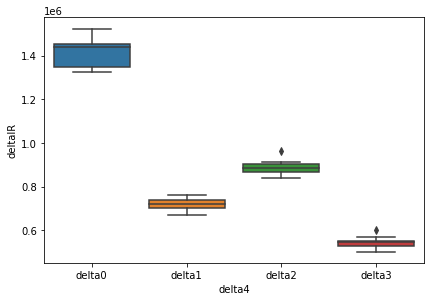

In [6]:
fig,ax=plt.subplots();
plt.tight_layout();
for x in lstdeltas:
    ax.plot(lstdeltas[x]['delta4'].sort_values(),lstdeltas[x]['delta0'].sort_values(),color='y')
    ax.plot(lstdeltas[x]['delta4'].sort_values(),lstdeltas[x]['delta1'].sort_values(),color='r')
    ax.plot(lstdeltas[x]['delta4'].sort_values(),lstdeltas[x]['delta2'].sort_values(),color='g')
    ax.plot(lstdeltas[x]['delta4'].sort_values(),lstdeltas[x]['delta3'].sort_values(),color='b')
    ax.set_xlabel("delta4")
    ax.set_ylabel("deltaIR")
    sb.boxplot(data=lstdeltas[x][['delta0','delta1','delta2','delta3']])
    break;
    


















# work with Relation try to save Samples names then work arround with it

In [7]:
data_verhalt=pd.DataFrame();
delta_verhalt_name=list();
for x in lstverhalt:
    #print(lstverhalt[x]['min'])
    delta_verhalt_name.append(x)
    data_verhalt[x]=lstverhalt[x]['min'];
    # fig, ax = plt.subplots()
    # ax.violinplot(lstverhalt[x]['min'].to_numpy(),bw_method=0.2);
    #sb.violinplot(data=lstverhalt[x][dleta_names_list[0:3]], inner="quartile", bw=0.2); 
    #lstverhalt[x][dleta_names_list].plot.box()
    # sb.violinplot(data=lstverhalt[x][dleta_names_list[0]], inner=None);
    # sb.swarmplot(data=lstverhalt[x][dleta_names_list[0]], size=2, color="k", alpha=0.5);
print(delta_verhalt_name)




['fischer1_p33_6_ch7_4_steel_brush', 'fischer1_p33_6_hf8_fc6x_0_9km', 'fischer1_p33_6_hf8_fc6x_4km', 'fischer2_p33_6_ch7_4_steel_brush', 'fischer2_p33_6_hf8_fc6', 'fischer2_p33_6_hf8_fc6x_0_9km', 'fischer2_p33_6_hf8_fc6x_4km', 'fischer_bb1_TS_blue ch8 12km', 'fischer_bb1_TS_blue ch8', 'fischer_bb1_TS_blue remeasure 2', 'fischer_bb1_TS_blue remeasure', 'fischer_bb2_TS_blue LF8 12km', 'fischer_bb2_TS_blue LF8', 'fischer_bb2_TS_blue remeasure', 'fischer_p33_6_hf8_fc6', 'madshus_base7_ts_blue', 'madshus_base7_ts_blue_ clockwise 45 turn', 'madshus_base7_ts_blue_poin']


0    1174
2    1202
7    1226
8    1320
3    1396
6    1406
1    1442
4    1462
5    1588
9    1598
Name: fischer1_p33_6_ch7_4_steel_brush, dtype: int64


Text(0.5, 356.09375, '')

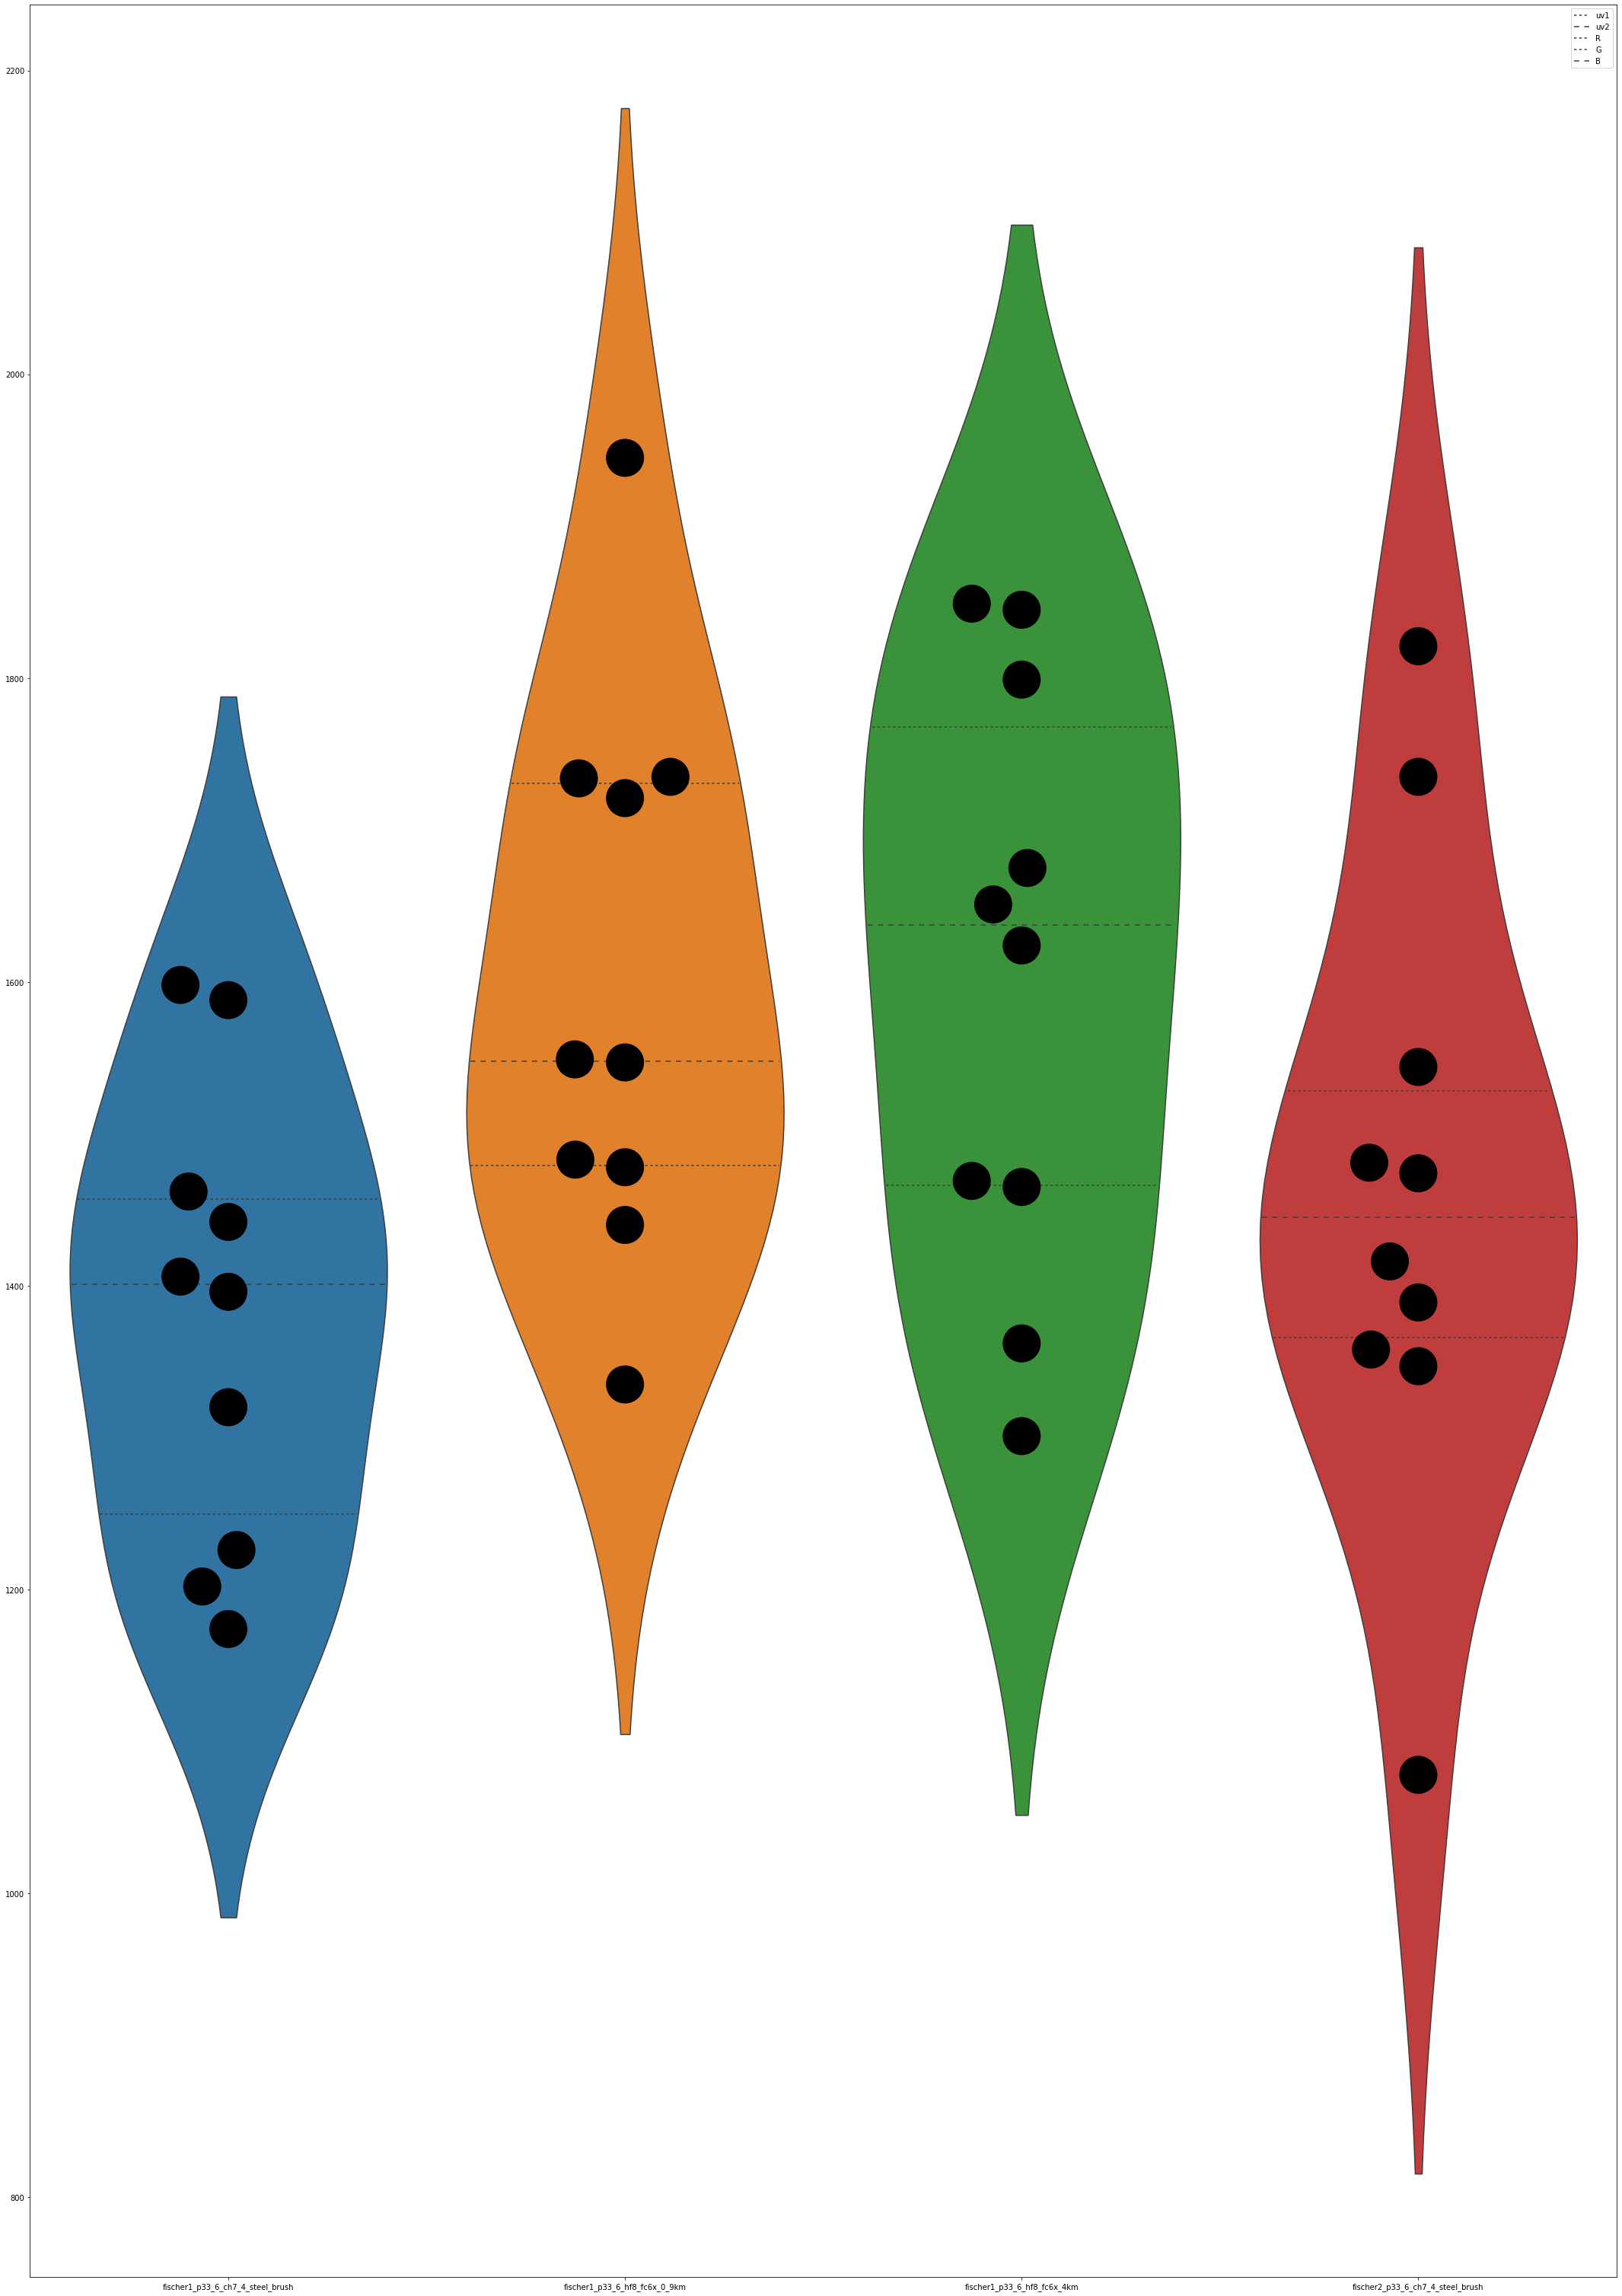

In [44]:
#print(data_verhalt.head())
for x in data_verhalt:
    datatoplot=data_verhalt[x].sort_values();

    print(datatoplot)
    break;
# fig, ax =plt.subplots()
# ax.violinplot(data_verhalt.iloc[:,:])
# plt.tight_layout();
a4_dims = (29.7, 42.0)
fig, ax = plt.subplots(figsize=a4_dims)
sb.violinplot(data=data_verhalt.iloc[:,[0,1,2,3]], size=4, inner="quartiles",scale='count');
sb.swarmplot(data=data_verhalt.iloc[:,[0,1,2,3]], size=50, color="k").set(xlabel=None);
fig.tight_layout();
plt.legend(('uv1', 'uv2', 'R','G','B'))
plt.xlabel(None)



In [43]:
print(deltas.head())

   fischer1_p33_6_ch7_4_steel_brush     delta0    delta1    delta2    delta3  \
0                                 0  1523637.0  761419.0  964407.0  601401.0   
1                                 1  1324311.0  672200.0  862092.0  502751.0   
2                                 2  1437409.0  724604.0  912057.0  569100.0   
3                                 3  1358611.0  695375.0  849578.0  524958.0   
4                                 4  1464062.0  739284.0  878688.0  550598.0   

    delta4     delta5    delta6    delta7    delta8  ...     delta0    delta1  \
0  64745.0  2227086.0  249769.0  182000.0  713837.0  ...  1459996.0  801003.0   
1  56484.0  2258328.0  252199.0  163686.0  710754.0  ...  1449543.0  796170.0   
2  64512.0  2805842.0  265572.0  179614.0  747535.0  ...  1457489.0  798718.0   
3  55938.0  2842280.0  270077.0  169558.0  755343.0  ...  1460539.0  796163.0   
4  59977.0  3128413.0  265678.0  180566.0  749452.0  ...  1454660.0  805119.0   

     delta2    delta3   delta4  